# Data Source / Data Preprocessing
The data used in this project are downloaded from the website "Our World in Data" (https://ourworldindata.org/coronavirus-testing). 

The following python code is used to download the csv file from the website.

In [ ]:
import requests
import pandas as pd
from zipfile import ZipFile

In [ ]:
# Download owid-covid-data.csv
csv_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
req = requests.get(csv_url)
url_content = req.content
csv_file = open('owid-covid-data.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

Let's have a look at the data we just download. Here are the first few rows:

In [ ]:
# Load Csv file in to pandas DataFrame
df = pd.read_csv("owid-covid-data.csv", parse_dates=["date"])
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


This dataset contains 59 features such as total_cases, new_cases and total_deaths. And it contains the data from all around the world (Manys thanks to their hardwork in collecting these data).

However, we are only interested in the data for the United Kingdom. 

Let's filter out the data for the UK only. This is done by droping all the rows where the iso_code is not GBR.

In [ ]:
# Filter the data for United Kingdom only
df_uk = df.drop(df[df.iso_code != 'GBR'].index)
df_uk.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
72007,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
72008,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
72009,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
72010,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
72011,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


Let's pick a starting date and ending date of the data that we are going to use.

I have select the data from March 2020 to Feb 2021, which is exactly 1 year of data.

In [ ]:
# Set a starting date and ending date of the data
STARTING_DATE = '2020-3-1'
ENDING_DATE = '2021-2-28'
# Select from March to Feb 2021. Data for exactly 1 year
df_uk = df_uk[(df_uk['date'] >= STARTING_DATE) & (df_uk['date'] <= ENDING_DATE)]

### Additional Features

I have decided to add two new features to the dataset. They are `case_population_ratio` and `case_population_density_ratio`. 
These two features are added because these features can represent the relationship between number of cases to the population.
These two features can be generated from existing features.

In [ ]:
# Add new features such as total_case/population
df_uk["case_population_ratio"] = df_uk["total_cases"] / df_uk["population"]
df_uk["case_population_density_ratio"] = df_uk["total_cases"] / df_uk["population_density"]

### Inspect and cleanup
Next look at the statistics of the dataset:

In [ ]:
df_uk.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_cases,365.0,1.065894e+06,1.279520e+06,9.400000e+01,2.575390e+05,3.366680e+05,1.621308e+06,4.188827e+06
new_cases,365.0,1.147607e+04,1.429730e+04,6.000000e+00,1.110000e+03,4.378000e+03,1.866800e+04,6.819200e+04
new_cases_smoothed,365.0,1.141098e+04,1.411292e+04,9.429000e+00,1.066000e+03,4.468286e+03,1.825414e+04,5.982857e+04
total_deaths,360.0,4.861024e+04,2.921743e+04,1.000000e+00,3.821450e+04,4.159700e+04,5.869575e+04,1.230830e+05
new_deaths,360.0,3.418972e+02,3.856922e+02,0.000000e+00,3.050000e+01,2.000000e+02,5.330000e+02,1.826000e+03
new_deaths_smoothed,365.0,3.348242e+02,3.480990e+02,0.000000e+00,2.814300e+01,2.411430e+02,4.950000e+02,1.253000e+03
total_cases_per_million,365.0,1.570123e+04,1.884806e+04,1.385000e+00,3.793698e+03,4.959314e+03,2.388280e+04,6.170384e+04
new_cases_per_million,365.0,1.690492e+02,2.106075e+02,8.800000e-02,1.635100e+01,6.449000e+01,2.749900e+02,1.004507e+03
new_cases_smoothed_per_million,365.0,1.680903e+02,2.078915e+02,1.390000e-01,1.570300e+01,6.582000e+01,2.688940e+02,8.813090e+02
total_deaths_per_million,360.0,7.160569e+02,4.303896e+02,1.500000e-02,5.629212e+02,6.127475e+02,8.646225e+02,1.813084e+03


### Missing Data and Constant Value Data

#### Missing Data
We can see that not all of the features have the count of 365 (some missing data). This is because of a few reasons.

1.   Not all the data are available from the earlier stage of the pandemic
2.   The dataset is collected from the whole world
3.   Not all the features are updated daily

For example, there is no data related to vaccination in the earlier stage of the pandemic.

There are methods to compensate for missing data, for example fill by mean, forward/backward filling or fill by 0. In this case, the data we have are time series data, fill by mean won't be a good option. Also, I have decided to drop features where there are too many missing data and only apply filling to features which have only a few missing data.

One thing to note is the feature `handwashing_facilities`, this have 0 count.There is because the dataset is collected from the whole world, other country might have data for `handwashing_facilities`, but the UK doesn't.

#### Constant Value Data
Besides of the missing data, there are data which are constants. For example features like `population` and `median_age`.
This is because the dataset contain the data across the whole world, these data are useful when we are considering in a global scale, but not that useful when we are focusing on the United Kingdom.

There are also a few features which are smoothed data or per million data, these data wouldn't be included as these data are similar to the non-smoothed data.

In [ ]:
# Drop country dependent columns such as "iso_code", "continent", "location" as data is only for UK
df_uk = df_uk.drop(["iso_code", "continent", "location"], axis=1)

# Drop columns which are constant across the range of date
df_uk = df_uk.drop(["population", "median_age", "aged_65_older", "aged_70_older", "gdp_per_capita",
                    "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", "male_smokers",
                    "hospital_beds_per_thousand", "life_expectancy", "human_development_index", "population_density"], axis=1)

# Drop columns which can't be fill with data before or after
df_uk = df_uk.drop(["people_vaccinated", "people_fully_vaccinated", "new_vaccinations_smoothed", "handwashing_facilities",
                    "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred",
                    "new_vaccinations_smoothed_per_million", "weekly_icu_admissions", "weekly_icu_admissions_per_million",
                    "weekly_hosp_admissions", "weekly_hosp_admissions_per_million", "total_vaccinations","new_vaccinations",
                    "total_vaccinations_per_hundred", "icu_patients", "hosp_patients","new_tests", "total_tests", "positive_rate", 
                    "tests_units", "tests_per_case"], axis=1)

# Drop columns which are smoothed data or per million data.
df_uk = df_uk.drop(["new_cases_smoothed", "new_deaths_smoothed", "total_cases_per_million", "new_cases_per_million",
                    "new_cases_smoothed_per_million","total_deaths_per_million","new_deaths_per_million","new_deaths_smoothed_per_million",
                    "icu_patients_per_million", "hosp_patients_per_million","total_tests_per_thousand", "new_tests_per_thousand", 
                    "new_tests_smoothed", "new_tests_smoothed_per_thousand"], axis=1)

### Filling in missing data

After dropping features which we are not interested, we can now fill in the missing data by forward/backward filling or fill by 0.

In [ ]:
df_uk.head()

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,stringency_index,case_population_ratio,case_population_density_ratio
72037,2020-03-01,94.0,33.0,NaN,NaN,NaN,11.11,0.000001,0.344451
72038,2020-03-02,134.0,40.0,NaN,NaN,NaN,11.11,0.000002,0.491026
72039,2020-03-03,189.0,55.0,NaN,NaN,2.71,11.11,0.000003,0.692566
72040,2020-03-04,246.0,57.0,NaN,NaN,2.34,11.11,0.000004,0.901436
72041,2020-03-05,295.0,49.0,NaN,NaN,1.96,11.11,0.000004,1.080990


In [ ]:
df_uk.tail()

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,stringency_index,case_population_ratio,case_population_density_ratio
72397,2021-02-24,4156707.0,9947.0,121979.0,443.0,0.81,86.11,0.061231,15231.723941
72398,2021-02-25,4166727.0,10020.0,122303.0,324.0,0.82,86.11,0.061378,15268.440956
72399,2021-02-26,4175315.0,8588.0,122648.0,345.0,0.75,86.11,0.061505,15299.910589
72400,2021-02-27,4182772.0,7457.0,122939.0,291.0,0.68,86.11,0.061615,15327.235817
72401,2021-02-28,4188827.0,6055.0,123083.0,144.0,0.61,86.11,0.061704,15349.423594


In [ ]:
df_uk['total_deaths'] = df_uk['total_deaths'].fillna(0)
df_uk['new_deaths'] = df_uk['new_deaths'].fillna(0)
df_uk['reproduction_rate'] = df_uk['reproduction_rate'].fillna(method='bfill')
df_uk['stringency_index'] = df_uk['stringency_index'].fillna(method='ffill')

In [ ]:
df_uk.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_cases,365.0,1.065894e+06,1.279520e+06,94.000000,257539.000000,336668.000000,1.621308e+06,4.188827e+06
new_cases,365.0,1.147607e+04,1.429730e+04,6.000000,1110.000000,4378.000000,1.866800e+04,6.819200e+04
total_deaths,365.0,4.794435e+04,2.956257e+04,0.000000,37527.000000,41586.000000,5.834200e+04,1.230830e+05
new_deaths,365.0,3.372137e+02,3.850958e+02,0.000000,27.000000,191.000000,5.320000e+02,1.826000e+03
reproduction_rate,365.0,1.147562e+00,4.985350e-01,0.230000,0.840000,1.070000,1.290000e+00,4.330000e+00
stringency_index,365.0,7.009060e+01,1.555417e+01,11.110000,65.740000,71.300000,7.963000e+01,8.796000e+01
case_population_ratio,365.0,1.570123e-02,1.884806e-02,0.000001,0.003794,0.004959,2.388280e-02,6.170384e-02
case_population_density_ratio,365.0,3.905832e+03,4.688637e+03,0.344451,943.718899,1233.677051,5.941077e+03,1.534942e+04


### Data Visualisation

We have now preprocessed the data, let's visualise them.

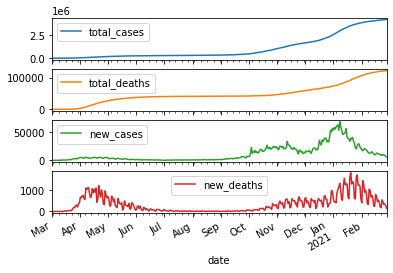

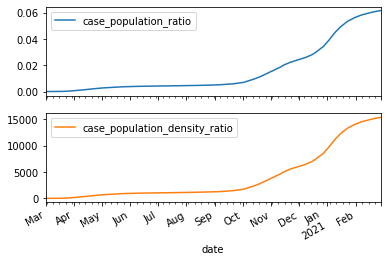

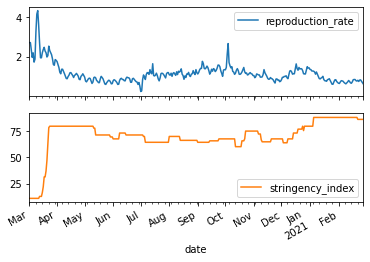

In [ ]:
date_time = df_uk['date']
date_time = pd.to_datetime(date_time)

plot_cols_1 = ["total_cases", "total_deaths","new_cases","new_deaths"]
plot_cols_2 = ["case_population_ratio","case_population_density_ratio"]
plot_cols_3 = ["reproduction_rate", "stringency_index"]
plot_features = df_uk[plot_cols_1]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_uk[plot_cols_2]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_uk[plot_cols_3]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

## The correlation between the features
A heat map can be plotted to see the correaltion between the features.

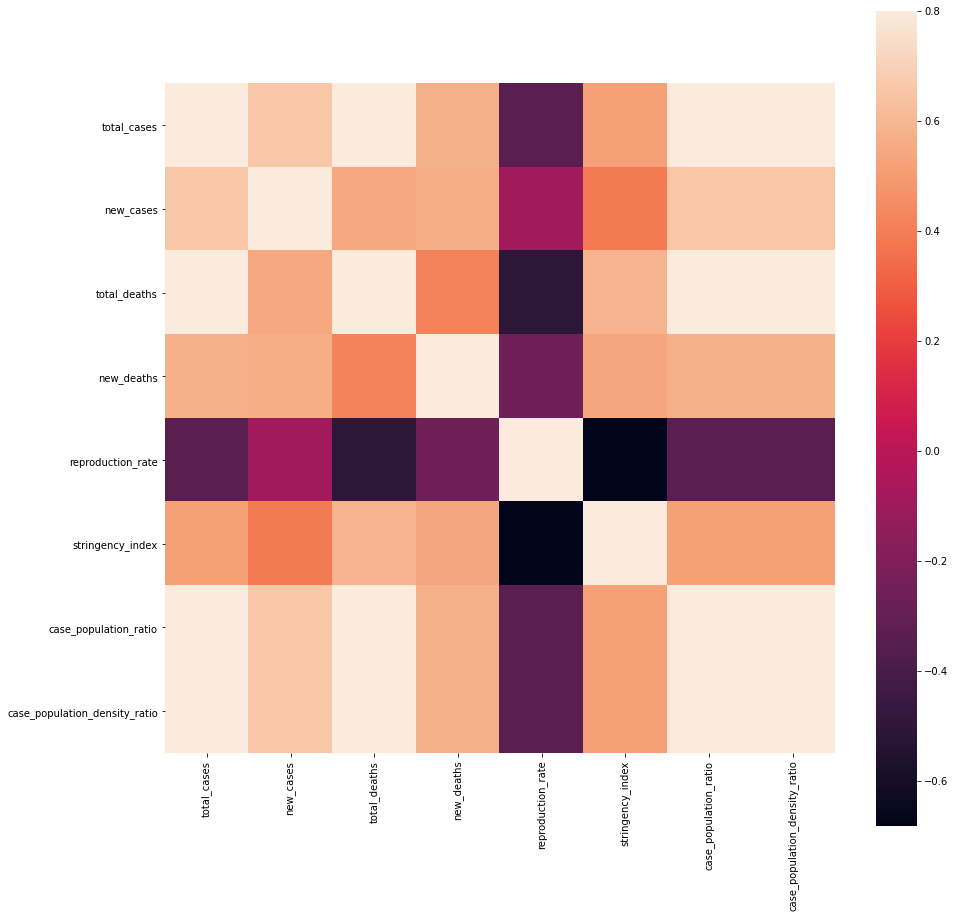

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
C_mat = df_uk.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

From the correlation heat map above, we see that about 6 features are highly correlated with the `total_cases`.


### Save the csv
Let's save our processed data into a new csv.

In [ ]:
df_uk.to_csv('owid-covid-data_uk.csv', index=False)

# Machine learning Framework
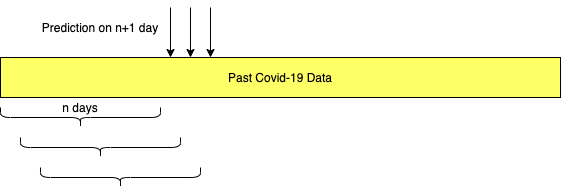

The approach that I am using in this project is shown in the diagram above. We will read the data for first n days and then predict for the n+1 day. Then we will hop ahead by one day and read the next chunk of data for next n days. In this project, I will take n = 14, which mean I use the data for the first 14 days and predict fot the 15th day. Hence this is a **Single step model**. And this single step model can be used to generate a sequence of data points in the future, this will be covered in the Prepare test dataset section.

The necessary python libraries are imported here-

* `numpy` is used to perform basic array operations
* `pyplot` from `matplotlib` is used to visualize the results
* `pandas` is used to read the dataset
* `MinMaxScaler` from `sklearn` is used scale the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('owid-covid-data_uk.csv', date_parser = True)

In [ ]:
data.head()

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,stringency_index,case_population_ratio,case_population_density_ratio
0,2020-03-01,94.0,33.0,0.0,0.0,2.71,11.11,0.000001,0.344451
1,2020-03-02,134.0,40.0,0.0,0.0,2.71,11.11,0.000002,0.491026
2,2020-03-03,189.0,55.0,0.0,0.0,2.71,11.11,0.000003,0.692566
3,2020-03-04,246.0,57.0,0.0,0.0,2.34,11.11,0.000004,0.901436
4,2020-03-05,295.0,49.0,0.0,0.0,1.96,11.11,0.000004,1.080990


### Split the data
Here we splitting the data into training and testing dataset. We are going to take data from March 2020 to December 2020 as training data. And we are going to take the data of February as testing data. In other word, we are gonna use the data of January and February to see how well our predictions are.

Note the data is **not** being randomly shuffled before splitting. This is for two reasons.

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the test results are more realistic, being evaluated on data collected after the model was trained.

In [ ]:
data_training = data[data['date']<'2021-01-01'].copy()
data_test = data[data['date']>='2021-01-01'].copy()

We are dropping the column `date` from the training dataset

In [ ]:
training_data = data_training.drop(['date'], axis = 1)
training_data.head()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,stringency_index,case_population_ratio,case_population_density_ratio
0,94.0,33.0,0.0,0.0,2.71,11.11,0.000001,0.344451
1,134.0,40.0,0.0,0.0,2.71,11.11,0.000002,0.491026
2,189.0,55.0,0.0,0.0,2.71,11.11,0.000003,0.692566
3,246.0,57.0,0.0,0.0,2.34,11.11,0.000004,0.901436
4,295.0,49.0,0.0,0.0,1.96,11.11,0.000004,1.080990


### Normalise the data
The values in the training data are not in the same range. For getting all the values in between the range 0 to 1 we are going to use MinMaxScalar() to normalize the data.This improves the accuracy of prediction.

In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.00000000e+00, 4.81944915e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.60247358e-05, 6.06893597e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.60247358e-05, 1.60247358e-05],
       [3.80587475e-05, 8.74640773e-04, 0.00000000e+00, ...,
        0.00000000e+00, 3.80587475e-05, 3.80587475e-05],
       ...,
       [9.57427084e-01, 9.50841619e-01, 9.73554101e-01, ...,
        1.00000000e+00, 9.57427084e-01, 9.57427084e-01],
       [9.77553752e-01, 8.96649590e-01, 9.86892505e-01, ...,
        1.00000000e+00, 9.77553752e-01, 9.77553752e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

As mentioned above we are going to train the model on data of 14 days at a time. So the code mentioned below divides the data into chunks of 14 rows, store the first 14 days into `X_train`, and the 15th day into `Y_train`. After dividing we are converting X_train and y_train into numpy arrays.

Notice that the `y_train` is storing rows of `training_data[i]`, which will be **all** the 8 features of the 15th day. This implies that we are training the model to predict all the features, and this is a **multi-ouput** model. The reason that we are doing a multi-output model will be covered in the Prepare test dataset section.

In [ ]:
X_train = []
y_train = []
days = 14
for i in range(days, training_data.shape[0]):
    X_train.append(training_data[i-days:i])
    y_train.append(training_data[i])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((292, 14, 8), (292, 8))

Also, let's take this opportunity to save the number of features as a variable, so it the code in the latter stage can be more clear.

In [ ]:
features_nums = len(training_data[0])
features_nums

8

### Building LSTM
Here we are importing the necessary layers to build out neural network

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(28, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], features_nums)))
model.add(Dropout(0.2))
model.add(LSTM(28, activation='relu'))
model.add(Dense(units = features_nums))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 28)            4144      
_________________________________________________________________
dropout (Dropout)            (None, 14, 28)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dense (Dense)                (None, 8)                 232       
Total params: 10,760
Trainable params: 10,760
Non-trainable params: 0
_________________________________________________________________


 *   The first layer is the LSTM layer with 28 units.
 *   We will be using relu activation function.
 *   `return_sequence` when set to True returns the full sequence as the output.
 *   `input_shape` is set to `(X_train.shape[1], features_nums)` which is (14,8)
 *  The value passed in dropout specifies the probability at which outputs of the layer are dropped out.
 *  The last layer is the `Dense layer` is the regular deeply connected neural network layer.
 *  As we are predicting a single value the `units` in the last layer is set to 1.



## Why relu as activation function
[Reference: ReLU — Most popular Activation Function for Deep Neural Networks](https://medium.com/@sonish.sivarajkumar/relu-most-popular-activation-function-for-deep-neural-networks-10160af37dda)
<br/>
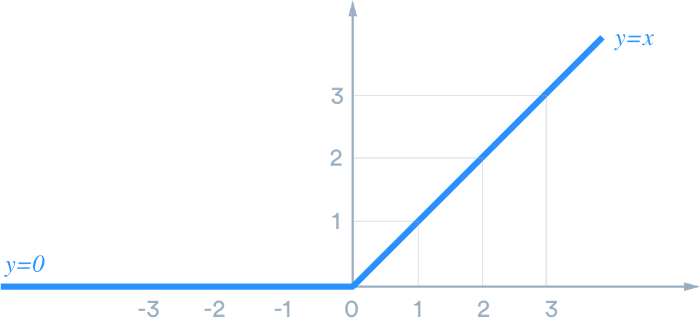

Relu is linear for all positive values, and zero for all negative values.
Which means:
1. It’s cheap to compute as there is no complicated math. The model can therefore take less time to train or run.
2. It converges faster. Linearity means that the slope doesn’t plateau, or “saturate,” when x gets large. It doesn’t have the vanishing gradient problem suffered by other activation functions like sigmoid or tanh.
3. It’s sparsely activated. Since ReLU is zero for all negative inputs, it’s likely for any given unit to not activate at all.

## Why mean squared error as loss function

[Reference: How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)
<br/>
Loss function used is `mean_squared_error`. This is chosen because we are solving a regression problem, and MSE is the default loss to ues for regression problems.

Mathematically, it is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. It is the loss function to be evaluated first and only changed if you have a good reason.

Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes.

## Why Adam as optimizer

[Reference: Various Optimization Algorithms For Training Neural Network](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6)
<br/>

Adam (Adaptive Moment Estimation) is said to be the best optimizer.
It has the advantages:

1. The method is too fast and converges rapidly
2. Rectifies vanishing learning rate, high variance.

Here we are compiling the model and fitting it to the training data. We will use 250 epochs to train the model. An epoch is an iteration over the entire data provided. batch_size is the number of samples per gradient update i.e. here the weights will be updates after 128 training examples.

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
history = model.fit(x=X_train, y=y_train, epochs=250, batch_size=128, shuffle=False)

Epoch 1/250
3/3 [==============================] - 2s 16ms/step - loss: 0.1702
Epoch 2/250
3/3 [==============================] - 0s 15ms/step - loss: 0.1550
Epoch 3/250
3/3 [==============================] - 0s 15ms/step - loss: 0.1399
Epoch 4/250
3/3 [==============================] - 0s 16ms/step - loss: 0.1232
Epoch 5/250
3/3 [==============================] - 0s 15ms/step - loss: 0.1053
Epoch 6/250
3/3 [==============================] - 0s 15ms/step - loss: 0.0853
Epoch 7/250
3/3 [==============================] - 0s 15ms/step - loss: 0.0655
Epoch 8/250
3/3 [==============================] - 0s 14ms/step - loss: 0.0516
Epoch 9/250
3/3 [==============================] - 0s 15ms/step - loss: 0.0444
Epoch 10/250
3/3 [==============================] - 0s 14ms/step - loss: 0.0392
Epoch 11/250
3/3 [==============================] - 0s 16ms/step - loss: 0.0400
Epoch 12/250
3/3 [==============================] - 0s 15ms/step - loss: 0.0411
Epoch 13/250
3/3 [==============================]

## Visualize the loss function

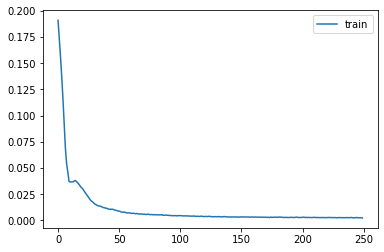

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

## Prepare test dataset

In order to predict the data on any day we need the data of previous n days. However, when we are trying to predict further in the future, this is impossible because we don't have the data for the future.

To solve this problem, we can either use a **multi-step** model which output multiple steps in the future. Or feed our **single-step** result back into the model to generate a sequence of data points.

I decided to use the latter method. The diagram below shows how we are usingg the prediction result to predict further in to the future.

Notice that we need 8 features input to the model, therefore we will need our model to predict 8 features output. Otherwise we can't generate further prediction values based on prediction result.

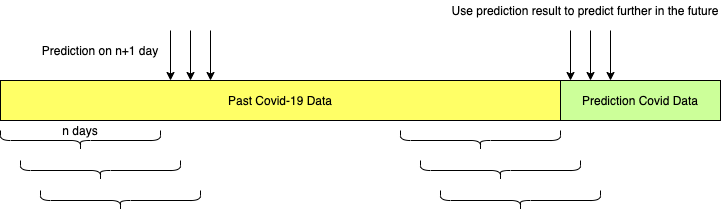

We are gonna predict the data in Jan 2021 and Feb 2021.
Before we start, we will create the numpy array `test_data` from the `data_test`. This makes the latter code more clear.

In [ ]:
test_data = data_test.reset_index(drop=True)
test_data = test_data.drop(['date'], axis=1)
test_data = test_data.to_numpy()

Here, we will prepare the test dataset the way similar to how we prepare the training dataset. We will make the our test input as chunks of 14rows based on the previous 14days data.

`past_days` will contain the data of the past 14 days required to predict the 15th day.

So we will need data from the training set. Then we will scale the data down.

Next, we are going to use our predicted result to predict further into the future. The for loop will do the job fo us. We first get a predicted output, then we append it to the input, reshape the input to the latest 14rows, and we make another prediction. This process will repeat for 28 times.

During this process, we will also record the prediction for `total_cases` and real total case number.

In [ ]:
past_days = data_training.tail(days)
past_days = past_days.drop(['date'],axis=1)
inputs = scaler.transform(past_days)

prediction = []
real_total_case = []
for i in range(len(data_test)):
  y_inputs = np.expand_dims(inputs, axis=0)
  y_pred = model.predict(y_inputs)
  inputs = np.delete(inputs,0,0)
  inputs = np.append(inputs,y_pred)
  inputs = inputs.reshape(days,features_nums)
  prediction.append(y_pred[0][0])
  real_total_case.append(test_data[i][0])

In [ ]:
prediction = np.array(prediction)
real_total_case = np.array(real_total_case)

In [ ]:
prediction.shape

(59,)

As we had scaled all the values down, now we will have to get them back to the original scale. scaler.scale\_ gives the scaling level for all features, and scaler.scale[0] gives the scaling for `total_cases`.

In [ ]:
scale = 1/scaler.scale_[0]
scale

2496141.0

In [ ]:
prediction = prediction*scale

We can then flatten the array for prediction and real total case to calculate the percentage difference.

In [ ]:
pred = prediction.flatten()
real = real_total_case.flatten()

In [ ]:
real

array([2549693., 2607546., 2662703., 2721626., 2782713., 2845269.,
       2898056., 2966248., 3026346., 3081372., 3127647., 3173295.,
       3220957., 3269761., 3325646., 3367074., 3405744., 3443354.,
       3476808., 3515800., 3553777., 3594098., 3627750., 3657861.,
       3680105., 3700272., 3725641., 3754452., 3783597., 3806997.,
       3828187., 3846855., 3863761., 3882976., 3903710., 3922914.,
       3941277., 3957181., 3971319., 3983760., 3996837., 4010380.,
       4025578., 4038933., 4049924., 4059700., 4070336., 4083096.,
       4095191., 4107290., 4117743., 4127578., 4138237., 4146760.,
       4156707., 4166727., 4175315., 4182772., 4188827.])

In [ ]:
# Percentage difference
diffs= ((pred-real)/real)*100
diffs

array([ -3.66625511,  -4.38343178,  -4.74729063,  -5.86618992,
        -6.97515338,  -7.3860591 ,  -7.50096789,  -8.27327149,
        -8.63094471,  -9.30351804,  -9.33956901,  -9.59017362,
       -10.31109698, -10.16858725, -10.50126802, -10.58410062,
       -10.61958121, -10.67049743, -10.61462123, -10.66932135,
       -10.7361337 , -10.9264202 , -10.99042795, -10.99056935,
       -10.79719872, -10.55881838, -10.4607234 , -10.44110432,
       -10.47171514, -10.39356611, -10.26093422, -10.07014171,
        -9.81886561,  -9.61125565,  -9.4403657 ,  -9.23656496,
        -8.99734401,  -8.69621582,  -8.34720782,  -7.94878457,
        -7.55543696,  -7.16143483,  -6.79216127,  -6.3631162 ,
        -5.8569988 ,  -5.30092741,  -4.740659  ,  -4.20662409,
        -3.6333226 ,  -3.03424521,  -2.36723734,  -1.65464469,
        -0.92721248,  -0.10093422,   0.7324127 ,   1.60948869,
         2.59276246,   3.67401092,   4.88270344])

In [ ]:
accuracy = 100-abs(diffs)
accuracy

array([96.33374489, 95.61656822, 95.25270937, 94.13381008, 93.02484662,
       92.6139409 , 92.49903211, 91.72672851, 91.36905529, 90.69648196,
       90.66043099, 90.40982638, 89.68890302, 89.83141275, 89.49873198,
       89.41589938, 89.38041879, 89.32950257, 89.38537877, 89.33067865,
       89.2638663 , 89.0735798 , 89.00957205, 89.00943065, 89.20280128,
       89.44118162, 89.5392766 , 89.55889568, 89.52828486, 89.60643389,
       89.73906578, 89.92985829, 90.18113439, 90.38874435, 90.5596343 ,
       90.76343504, 91.00265599, 91.30378418, 91.65279218, 92.05121543,
       92.44456304, 92.83856517, 93.20783873, 93.6368838 , 94.1430012 ,
       94.69907259, 95.259341  , 95.79337591, 96.3666774 , 96.96575479,
       97.63276266, 98.34535531, 99.07278752, 99.89906578, 99.2675873 ,
       98.39051131, 97.40723754, 96.32598908, 95.11729656])

## Visulisation

In [ ]:
len(data_test)

59

We can now plot the result. And the code below will generate the time-axis which we are going to use in the plot.

In [ ]:
train_datetime = data_training['date']
train_datetime = pd.to_datetime(train_datetime)
train_datetime

0     2020-03-01
1     2020-03-02
2     2020-03-03
3     2020-03-04
4     2020-03-05
         ...    
301   2020-12-27
302   2020-12-28
303   2020-12-29
304   2020-12-30
305   2020-12-31
Name: date, Length: 306, dtype: datetime64[ns]

In [ ]:
x_datetime = data_test['date']
x_datetime = pd.to_datetime(x_datetime)
print(x_datetime[min(x_datetime.index)])
x_datetime

2021-01-01 00:00:00


306   2021-01-01
307   2021-01-02
308   2021-01-03
309   2021-01-04
310   2021-01-05
311   2021-01-06
312   2021-01-07
313   2021-01-08
314   2021-01-09
315   2021-01-10
316   2021-01-11
317   2021-01-12
318   2021-01-13
319   2021-01-14
320   2021-01-15
321   2021-01-16
322   2021-01-17
323   2021-01-18
324   2021-01-19
325   2021-01-20
326   2021-01-21
327   2021-01-22
328   2021-01-23
329   2021-01-24
330   2021-01-25
331   2021-01-26
332   2021-01-27
333   2021-01-28
334   2021-01-29
335   2021-01-30
336   2021-01-31
337   2021-02-01
338   2021-02-02
339   2021-02-03
340   2021-02-04
341   2021-02-05
342   2021-02-06
343   2021-02-07
344   2021-02-08
345   2021-02-09
346   2021-02-10
347   2021-02-11
348   2021-02-12
349   2021-02-13
350   2021-02-14
351   2021-02-15
352   2021-02-16
353   2021-02-17
354   2021-02-18
355   2021-02-19
356   2021-02-20
357   2021-02-21
358   2021-02-22
359   2021-02-23
360   2021-02-24
361   2021-02-25
362   2021-02-26
363   2021-02-27
364   2021-02-

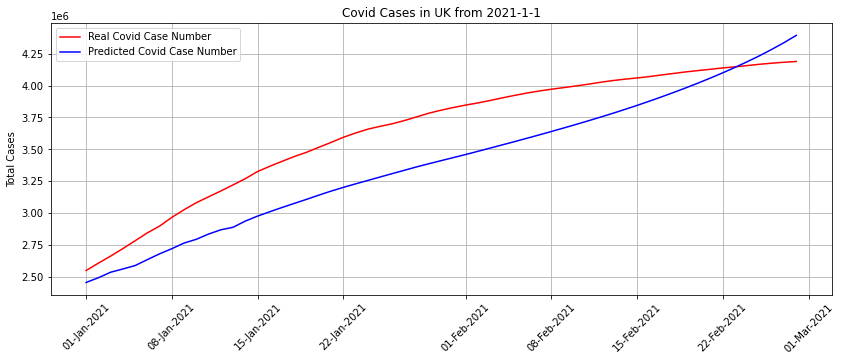

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(x_datetime, real_total_case, color = 'red', label = 'Real Covid Case Number')
ax.plot(x_datetime, prediction, color = 'blue', label = 'Predicted Covid Case Number')
plt.title('Covid Cases in UK from 2021-1-1')
plt.ylabel('Total Cases')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
# Set the format of x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.show()

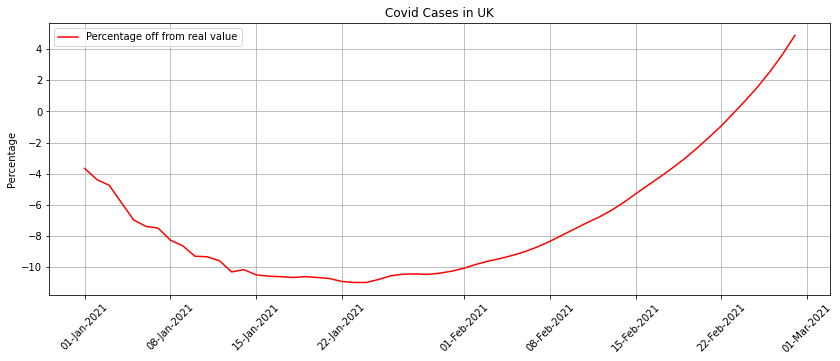

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(x_datetime, diffs, color = 'red', label = 'Percentage off from real value')
plt.title('Covid Cases in UK')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
# Set the format of x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.show()

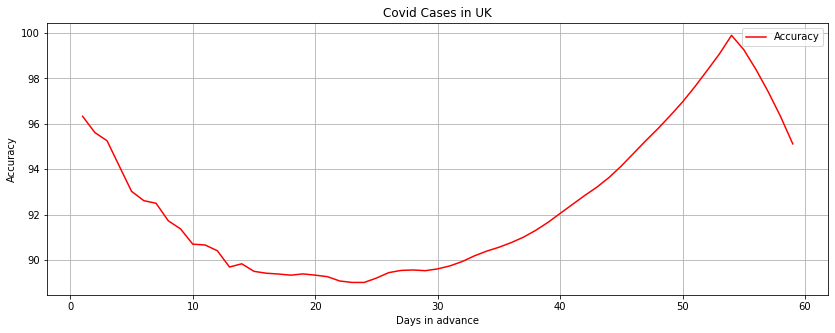

In [ ]:
x = [i for i in range(1,len(test_data)+1,1)]
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(x, accuracy, color = 'red', label = 'Accuracy')
plt.title('Covid Cases in UK')
plt.ylabel('Accuracy')
plt.xlabel('Days in advance')
plt.legend()
plt.grid()
plt.show()

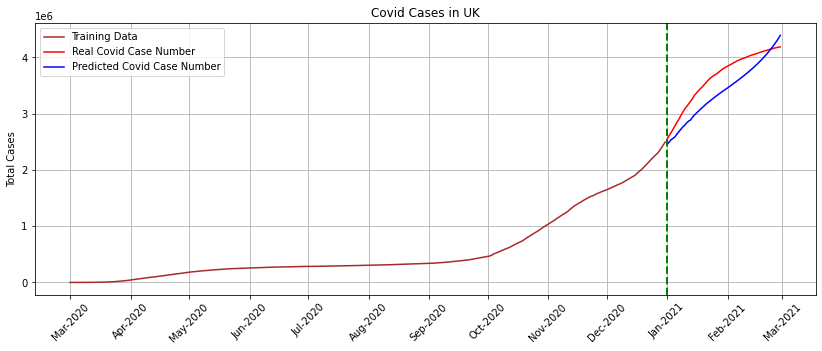

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(train_datetime, data_training['total_cases'], color = 'brown', label= 'Training Data')
ax.plot(x_datetime, real_total_case, color = 'red', label = 'Real Covid Case Number')
ax.plot(x_datetime, prediction, color = 'blue', label = 'Predicted Covid Case Number')
ax.axvline(x=x_datetime[min(x_datetime.index)], color='green', linewidth=2, linestyle='--')
plt.title('Covid Cases in UK')
plt.ylabel('Total Cases')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.show()

## Save the model

Finally, we save the model.
Notice that the commented code can be used to load the model we just train.

In [ ]:
model.save('SNS_covid_prediction.h5')
# import tensorflow as tf
# model = tf.keras.models.load_model('path/to/location')